In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action = 'ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [149]:
# pip install imbalanced-learn

## Importing the dataset

In [150]:
df = pd.read_csv("train.csv")

In [151]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


## Checking the shape of the dataset

In [152]:
df.shape
#Train set contains 79853 records and 13 features.

(79853, 13)

## Loaded the test dataset

In [153]:
#test = pd.read_csv("test.csv")

In [154]:
#test.head()

In [155]:
#test.shape
# Test set contains 34224 records and 11 features.

## Check for datatypes

In [156]:
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
target                                int64
dtype: object

## To check for missing values

In [157]:
df.isnull().sum()/ len(df) * 100

id                                  0.000000
perc_premium_paid_by_cash_credit    0.000000
age_in_days                         0.000000
Income                              0.000000
Count_3-6_months_late               0.121473
Count_6-12_months_late              0.121473
Count_more_than_12_months_late      0.121473
application_underwriting_score      3.724343
no_of_premiums_paid                 0.000000
sourcing_channel                    0.000000
residence_area_type                 0.000000
premium                             0.000000
target                              0.000000
dtype: float64

## Missing Value Treatment for the below features

- Count_3-6_months_late 
- Count_6-12_months_late
- Count_more_than_12_months_late
- application_underwriting_score

In [158]:
df.dropna(subset=['Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'],how = 'any', inplace=True)

In [159]:
df['application_underwriting_score'].fillna(df['application_underwriting_score'].median(), inplace = True)

## Rechecking missing values after treatment

In [160]:
df.isnull().sum()/ len(df) * 100

id                                  0.0
perc_premium_paid_by_cash_credit    0.0
age_in_days                         0.0
Income                              0.0
Count_3-6_months_late               0.0
Count_6-12_months_late              0.0
Count_more_than_12_months_late      0.0
application_underwriting_score      0.0
no_of_premiums_paid                 0.0
sourcing_channel                    0.0
residence_area_type                 0.0
premium                             0.0
target                              0.0
dtype: float64

## Checking for duplicate values.

In [161]:
df.duplicated().sum()

0

As we can see there are no duplicate values in the dataset.

## Removing insignificant variable

In [162]:
df.drop(['id'], axis = 1 , inplace = True)

In [163]:
df.columns

Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

## Changing the age_in_days variable to -- age_in_years for better analysis

In [164]:
x=df['age_in_days'].apply(lambda x: round(x/365))

In [165]:
df.insert(loc=2, column ='age_in_years', value=x )

In [166]:
def age_cat(x):
    if x >= 20 and x < 40:
        return 'young_adult'
    elif x >= 40 and x < 60:
        return 'adult'
    elif x>=60:
        return 'old_age'

In [167]:
agecat = df['age_in_years'].apply(age_cat)
df.insert(loc=3, column ='age_category', value=agecat)

In [168]:
df.head()

,perc_premium_paid_by_cash_credit,age_in_days,age_in_years,age_category,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,0.429,12058,33,young_adult,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,0.010,21546,59,adult,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,0.917,17531,48,adult,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,0.049,15341,42,adult,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,0.052,31400,86,old_age,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [169]:
df1=df[df['target']==0]
df1['age_category'].value_counts()

adult          2630
young_adult    1556
old_age         752
Name: age_category, dtype: int64

<AxesSubplot:xlabel='age_category', ylabel='target'>

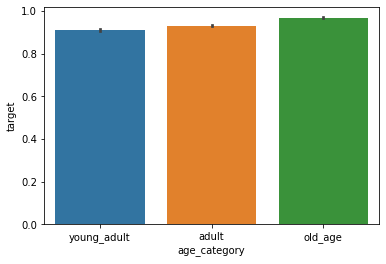

In [170]:
sns.barplot(df['age_category'],df['target'])

## Converting the income variable from numerical to categorical for business analysis.

In [171]:
def income_range(x):
    if x<100000:
        return "Low"
    elif (x>=100000 and x<=200000):
        return "Medium"
    elif (x>200000):
        return 'High'

# Low Income <=100000
# Medium Income > 100000 and <=200000
#High Income >200000


In [172]:
df['Income'] = df['Income'].apply(income_range) 

In [173]:
df.head()

,perc_premium_paid_by_cash_credit,age_in_days,age_in_years,age_category,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,0.429,12058,33,young_adult,High,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,0.010,21546,59,adult,High,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,0.917,17531,48,adult,Low,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,0.049,15341,42,adult,High,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,0.052,31400,86,old_age,Medium,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


## Dropped redundant columns 

In [174]:
df.drop(['age_in_days', 'age_in_years'], inplace= True, axis =1)

In [175]:
df.columns

Index(['perc_premium_paid_by_cash_credit', 'age_category', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

## Seperating numerical and categorical variables.

In [176]:
df_num = df.select_dtypes(np.number)
df_num.columns


Index(['perc_premium_paid_by_cash_credit', 'Count_3-6_months_late',
       'Count_6-12_months_late', 'Count_more_than_12_months_late',
       'application_underwriting_score', 'no_of_premiums_paid', 'premium',
       'target'],
      dtype='object')

In [177]:
df_cat = df.select_dtypes(np.object)
df_cat.columns

Index(['age_category', 'Income', 'sourcing_channel', 'residence_area_type'], dtype='object')

In [178]:
df_target = df_num['target']
df_num= df_num.drop(['target'], axis=1)

In [179]:
df_target.head()

0    1
1    1
2    0
3    1
4    1
Name: target, dtype: int64

## Checking for Outliers

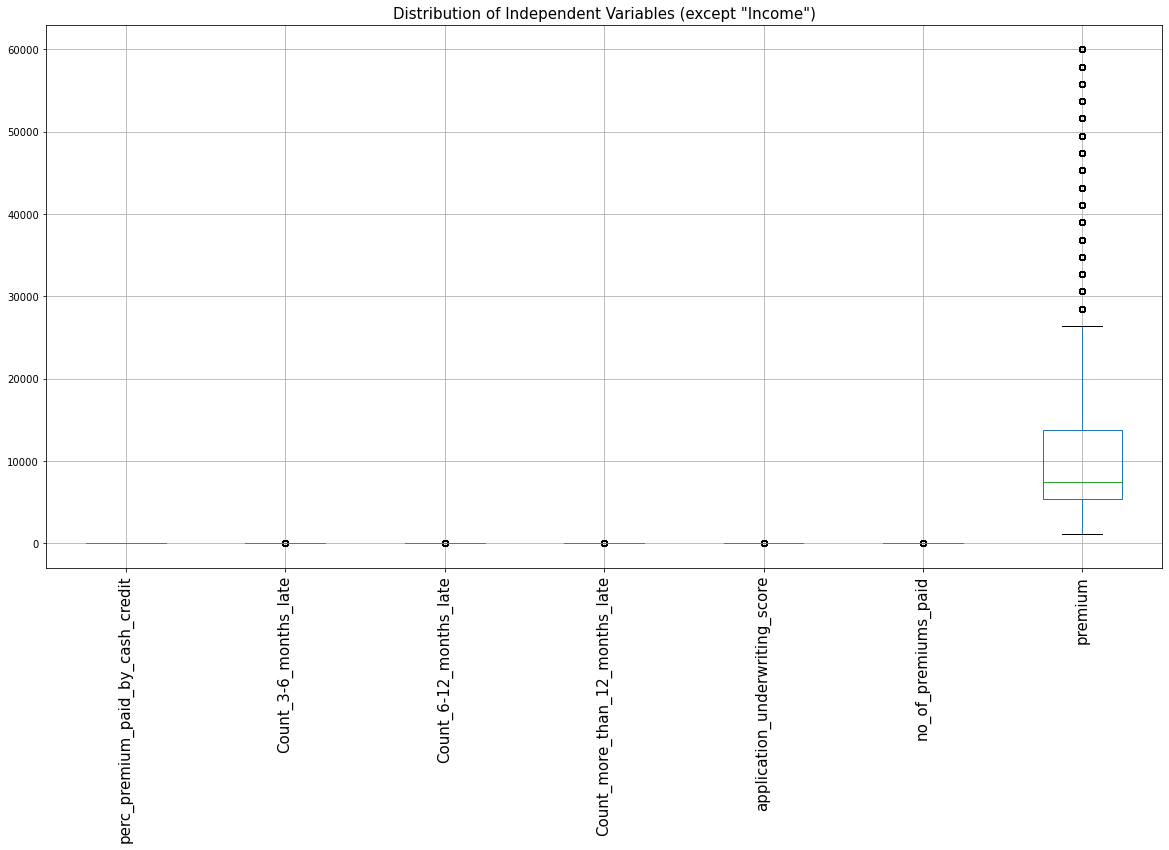

In [180]:
plt.figure(figsize=(20,10))
df_num[['perc_premium_paid_by_cash_credit', 'Count_3-6_months_late',
       'Count_6-12_months_late', 'Count_more_than_12_months_late',
       'application_underwriting_score', 'no_of_premiums_paid', 'premium']].boxplot()

plt.title('Distribution of Independent Variables (except "Income")', fontsize = 15)

 
plt.xticks(rotation = 'vertical', fontsize = 15)

 
plt.show()

## Checking Skewness

Before Transformation

In [181]:
df_num.skew()


perc_premium_paid_by_cash_credit     0.896233
Count_3-6_months_late                4.150116
Count_6-12_months_late              10.353299
Count_more_than_12_months_late       7.850188
application_underwriting_score      -2.823478
no_of_premiums_paid                  1.232327
premium                              2.197272
dtype: float64

In [182]:
yej = PowerTransformer(method ='yeo-johnson')
tran = yej.fit_transform(df_num)


In [183]:
df_num_trans = pd.DataFrame(tran, columns=['perc_premium_paid_by_cash_credit', 'Count_3-6_months_late',
       'Count_6-12_months_late', 'Count_more_than_12_months_late',
       'application_underwriting_score', 'no_of_premiums_paid', 'premium'])

After Transformation

In [184]:
df_num_trans.skew()

perc_premium_paid_by_cash_credit    0.278415
Count_3-6_months_late               1.830500
Count_6-12_months_late              4.168023
Count_more_than_12_months_late      4.301268
application_underwriting_score     -0.139461
no_of_premiums_paid                 0.001228
premium                            -0.003974
dtype: float64

## Five-Point Summary/ Statistical Information about dataset

In [185]:
df.describe(include=np.number)

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000
mean,0.313454,0.248671,0.078188,0.060008,99.072253,10.874643,10931.478509,0.938086
std,0.334263,0.691468,0.436507,0.312023,0.726703,5.164617,9403.342176,0.241001
min,0.000000,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,0.034000,0.000000,0.000000,0.000000,98.830000,7.000000,5400.000000,1.000000
50%,0.167000,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,0.536000,0.000000,0.000000,0.000000,99.520000,14.000000,13800.000000,1.000000
max,1.000000,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


From the above plot we can conclude that for age group of 40-60  the premium is high compare to young_adults and old_age

From the above plot we can conclude that higher the income, higher will be the premium 

# Numerical vs Cateogrical

In [186]:
df.groupby('sourcing_channel')['Income'].describe()

,count,unique,top,freq
sourcing_channel,,,,
A,43070,3,Medium,17607
B,16496,3,High,7048
C,12026,3,High,5713
D,7555,3,High,4102
E,609,3,High,374


In [187]:
df.groupby('residence_area_type')['perc_premium_paid_by_cash_credit'].describe()

,count,mean,std,min,25%,50%,75%,max
residence_area_type,,,,,,,,
Rural,31640.0,0.314284,0.334054,0.0,0.034,0.167,0.536,1.0
Urban,48116.0,0.312908,0.334402,0.0,0.033,0.166,0.536,1.0


In [188]:
df.groupby('residence_area_type')['Income'].describe()

,count,unique,top,freq
residence_area_type,,,,
Rural,31640,3,Medium,12547
Urban,48116,3,Medium,19276


<AxesSubplot:xlabel='residence_area_type', ylabel='no_of_premiums_paid'>

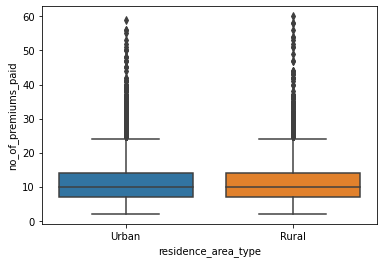

In [189]:
sns.boxplot(x='residence_area_type',y='no_of_premiums_paid',data=df)

In [190]:
df.groupby('residence_area_type')['no_of_premiums_paid'].describe()*100

,count,mean,std,min,25%,50%,75%,max
residence_area_type,,,,,,,,
Rural,3164000.0,1085.028445,514.830100,200.0,700.0,1000.0,1400.0,6000.0
Urban,4811600.0,1089.066007,517.530922,200.0,700.0,1000.0,1400.0,5900.0


# Categorical Vs Categorical

In [191]:
df['residence_area_type'].value_counts()

Urban    48116
Rural    31640
Name: residence_area_type, dtype: int64

In [192]:
df['residence_area_type'].value_counts(normalize=True)*100

Urban    60.329003
Rural    39.670997
Name: residence_area_type, dtype: float64

In [193]:
df['sourcing_channel'].value_counts()

A    43070
B    16496
C    12026
D     7555
E      609
Name: sourcing_channel, dtype: int64

In [194]:
df['sourcing_channel'].value_counts(normalize=True)*100

A    54.002207
B    20.683083
C    15.078489
D     9.472642
E     0.763579
Name: sourcing_channel, dtype: float64

# Univariate Analysis for Numerical columns

<AxesSubplot:xlabel='perc_premium_paid_by_cash_credit', ylabel='Density'>

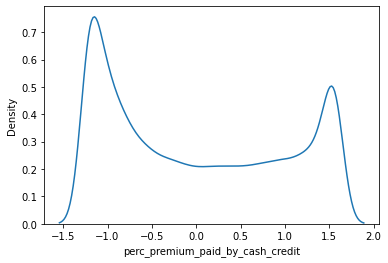

In [195]:
sns.distplot(df_num_trans['perc_premium_paid_by_cash_credit'], hist= False)

Data is not normally distributed.

<AxesSubplot:xlabel='Count_3-6_months_late', ylabel='Density'>

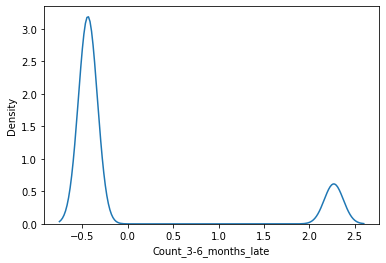

In [196]:
sns.distplot(df_num_trans['Count_3-6_months_late'], hist= False)

Data is not normally distributed.

<AxesSubplot:xlabel='Count_6-12_months_late', ylabel='Density'>

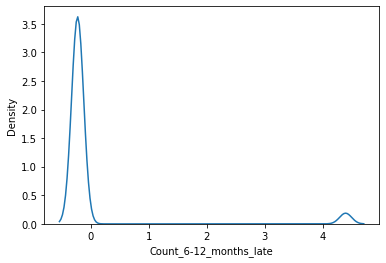

In [197]:
sns.distplot(df_num_trans['Count_6-12_months_late'], hist= False)

- Data is not normally distributed. 
- Data is right skewed

<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='Density'>

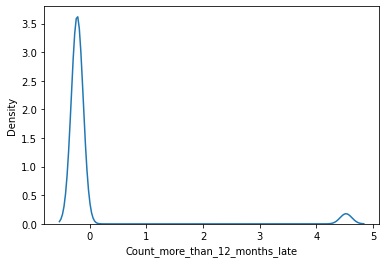

In [198]:
sns.distplot(df_num_trans['Count_more_than_12_months_late'], hist= False)

- Data is not normally distributed. 
- Data is right skewed

<AxesSubplot:xlabel='application_underwriting_score', ylabel='Density'>

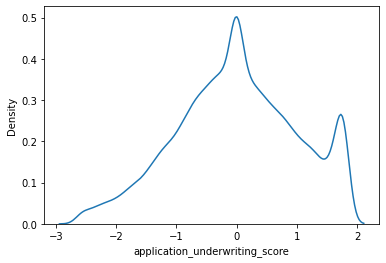

In [199]:
sns.distplot(df_num_trans['application_underwriting_score'], hist= False)
#df['application_underwriting_score'].dtypes

- Data is not normally distributed.

<AxesSubplot:xlabel='no_of_premiums_paid', ylabel='Density'>

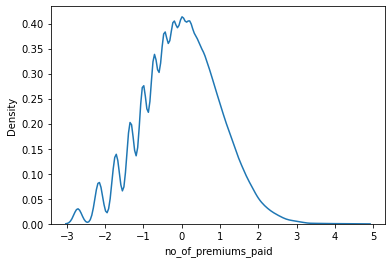

In [200]:
sns.distplot(df_num_trans['no_of_premiums_paid'], hist= False)

It is slightly right skewed.

<AxesSubplot:xlabel='premium', ylabel='Density'>

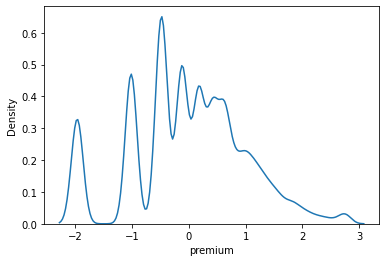

In [201]:
sns.distplot(df_num_trans['premium'], hist= False)

- Data is not normally distributed.

# Univariate Analysis for Categorical columns

In [202]:
df_cat.columns

Index(['age_category', 'Income', 'sourcing_channel', 'residence_area_type'], dtype='object')

<AxesSubplot:xlabel='age_category', ylabel='count'>

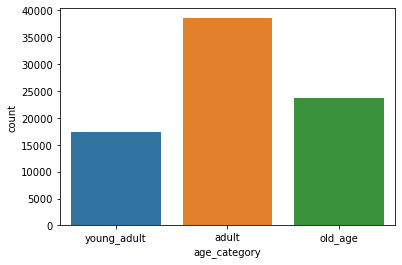

In [203]:
sns.countplot(df['age_category'])

- From the above plot we can see that majority of the customers are in adult age category (40 -60 years)

<AxesSubplot:xlabel='Income', ylabel='count'>

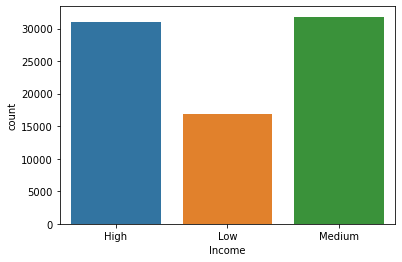

In [204]:
sns.countplot(df['Income'])

- From the above plot we can see that majority of customers falls in medium income category.
- Also we can see that least number of customers falls in low income category.
- Low Income <=100000
- Medium Income > 100000 and <=200000
- High Income >200000

<AxesSubplot:xlabel='sourcing_channel', ylabel='count'>

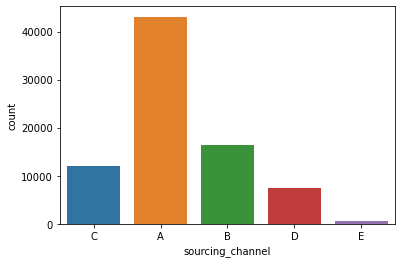

In [205]:
sns.countplot(df['sourcing_channel'])

- As we can see from the plot that majority of the customers are from sourcing channel A and least from E.

<AxesSubplot:xlabel='residence_area_type', ylabel='count'>

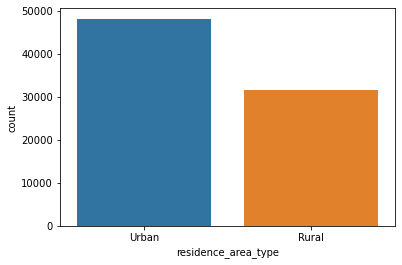

In [206]:
sns.countplot(df['residence_area_type'])

- Majority of the customers are from Urban area.

In [207]:
df['target'].value_counts(normalize=True) * 100

1    93.808616
0     6.191384
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

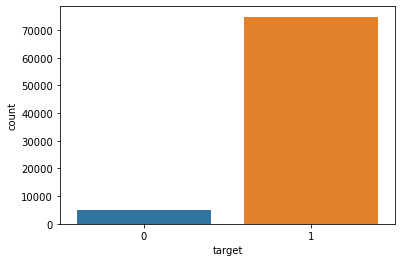

In [208]:
sns.countplot(x='target', data = df)

# Bivariate Analysis

<AxesSubplot:xlabel='age_category', ylabel='premium'>

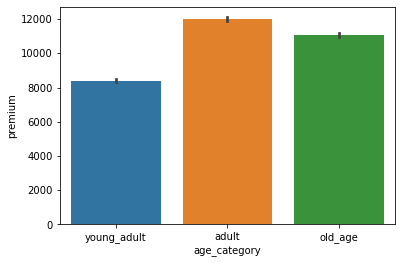

In [209]:
sns.barplot(df['age_category'],df['premium'])

- From the above plot we can conclude that majority of customers are from adult category(age group:40-60) with high premium.

<AxesSubplot:xlabel='Income', ylabel='premium'>

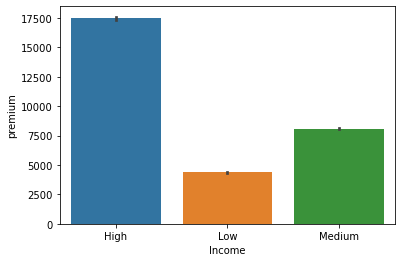

In [210]:
sns.barplot(df['Income'], df['premium'])


- Premium is directly proportional to income category.

Income   High    Low  Medium
target                      
0        1372   1469    2097
1       29613  15479   29726


<AxesSubplot:xlabel='target'>

<Figure size 720x576 with 0 Axes>

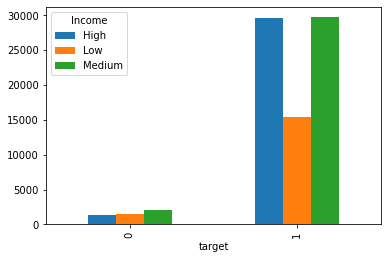

In [211]:

plt.figure(figsize=(10,8))
tab = pd.crosstab(index = df['target'], columns =df['Income'])
print(tab)
tab.plot(kind = 'bar')

In [212]:
df.columns

Index(['perc_premium_paid_by_cash_credit', 'age_category', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

From the above plot we can conclude that customers with medium are more likely to become defaulter.

<AxesSubplot:xlabel='target'>

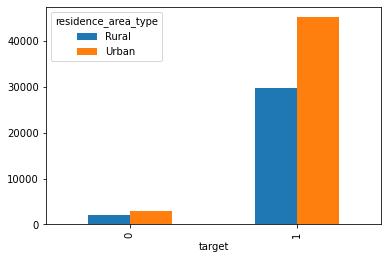

In [213]:
v =pd.crosstab(index=df["target"],columns=df["residence_area_type"])
v.plot(kind='bar')

- Majority of defaulters are from urban area.

In [214]:
df.columns

Index(['perc_premium_paid_by_cash_credit', 'age_category', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

<AxesSubplot:xlabel='Income', ylabel='perc_premium_paid_by_cash_credit'>

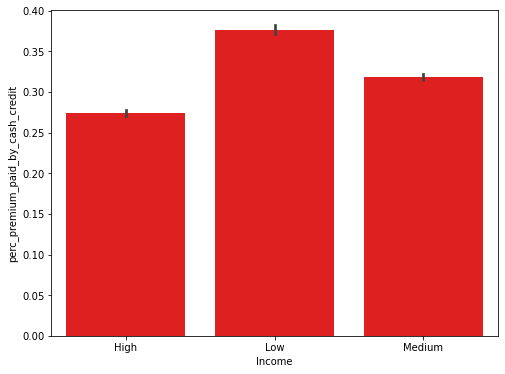

In [215]:
plt.figure(figsize=(8,6))
sns.barplot(df['Income'], df['perc_premium_paid_by_cash_credit'], color='r')

- From the plot we can conclude that majority of people with low income paid the premium through cash credit. 

Income         High   Low  Medium
age_category                     
adult         17991  5697   14836
old_age        9119  5188    9492
young_adult    3875  6063    7495


<AxesSubplot:xlabel='age_category'>

<Figure size 720x576 with 0 Axes>

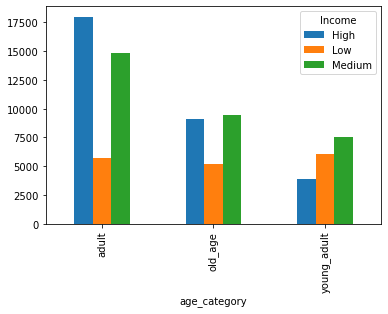

In [216]:

plt.figure(figsize=(10,8))
tab = pd.crosstab(index = df['age_category'], columns =df['Income'])
print(tab)
tab.plot(kind = 'bar')

- From the above plot we can conclude that Customers with high income belong to adult category(age group : 40 - 60).

<AxesSubplot:xlabel='Income', ylabel='Count_3-6_months_late'>

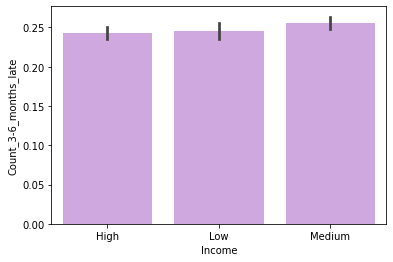

In [217]:
sns.barplot(df['Income'], df['Count_3-6_months_late'] , color='#d19fe8')

- From the above plot we can conclude that if the income of the customer is medium then there will be more likely to delay the payment of premium 3-6 months late.

<AxesSubplot:xlabel='Income', ylabel='Count_more_than_12_months_late'>

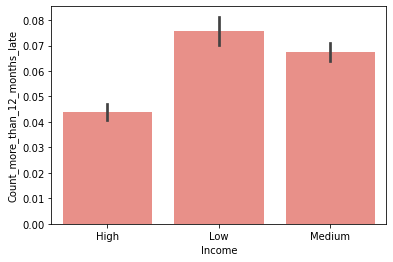

In [218]:
sns.barplot(df['Income'], df['Count_more_than_12_months_late'],  color='#f88379', )

- From the above plot we can conclude that if the income of the customer is low then there will be high chance of delaying the payment of premium by more than 12 months.

<AxesSubplot:xlabel='residence_area_type'>

<Figure size 720x576 with 0 Axes>

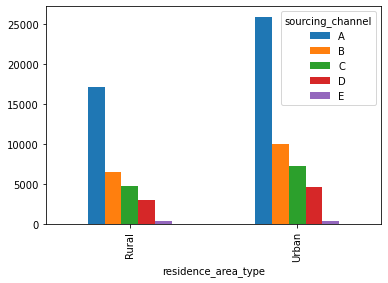

In [219]:
plt.figure(figsize=(10,8))
tab = pd.crosstab(index = df['residence_area_type'], columns =df['sourcing_channel'])
tab.plot(kind = 'bar')

Income                High    Low  Medium
residence_area_type                      
Rural                12260   6833   12547
Urban                18725  10115   19276


<AxesSubplot:xlabel='residence_area_type'>

<Figure size 720x576 with 0 Axes>

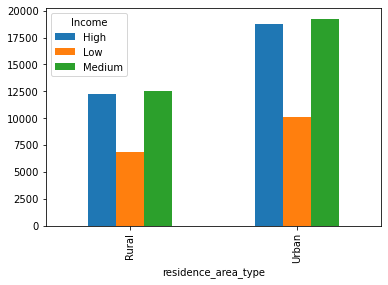

In [220]:
plt.figure(figsize=(10,8))
tab = pd.crosstab(index = df['residence_area_type'], columns =df['Income'])
print(tab)
tab.plot(kind = 'bar')

From the above plot we can say that both urban and rural customers have approximately same average income.

<AxesSubplot:xlabel='residence_area_type', ylabel='premium'>

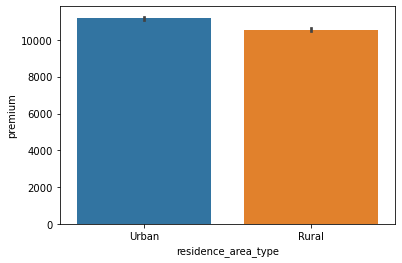

In [221]:
sns.barplot(df['residence_area_type'],df['premium'])

From the above plot we can conclude that urban customers are paying more premium than rural customers.

# Bi variate Analysis

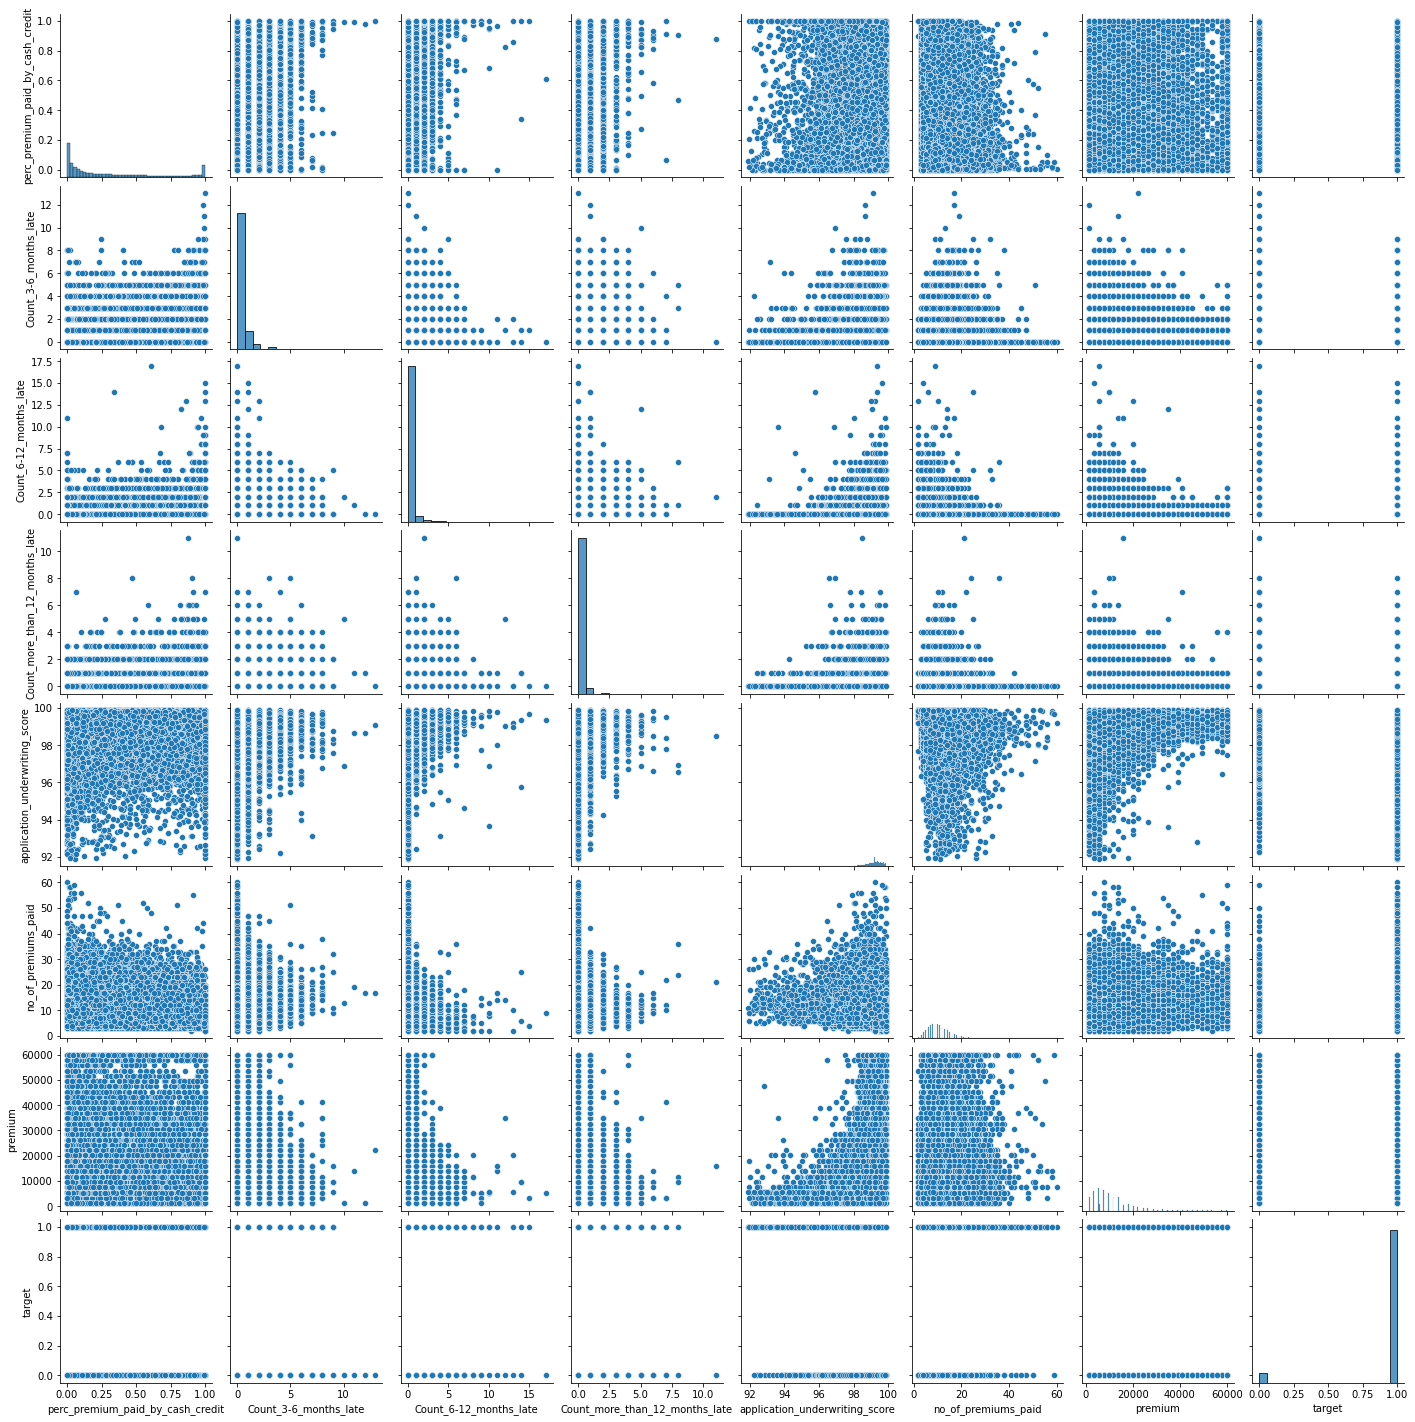

In [222]:
sns.pairplot(df.select_dtypes(include=np.number))

# Multi Variate analysis

In [223]:
table=pd.pivot_table(df,index=['residence_area_type'],values=['no_of_premiums_paid'],columns=['sourcing_channel'],aggfunc=np.mean)
table

no_of_premiums_paid                                   \
sourcing_channel                      A          B          C          D   
residence_area_type                                                        
Rural                         10.583982  11.226546  11.117598  11.082443   
Urban                         10.633868  11.304183  11.145577  11.039702   

                                
sourcing_channel             E  
residence_area_type             
Rural                11.340741  
Urban                10.923304

<AxesSubplot:title={'center':'Stacked Bar chart'}, xlabel='residence_area_type'>

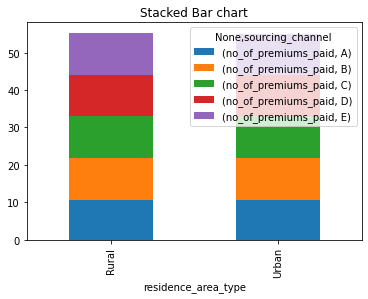

In [224]:
table.plot.bar(title = 'Stacked Bar chart', stacked= True, label='sourcing_channel')

<AxesSubplot:xlabel='application_underwriting_score', ylabel='perc_premium_paid_by_cash_credit'>

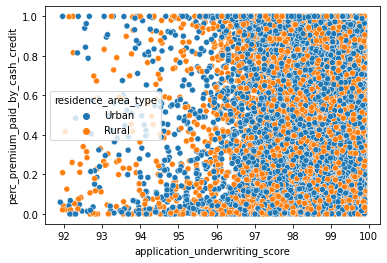

In [225]:
sns.scatterplot(df['application_underwriting_score'], df['perc_premium_paid_by_cash_credit'],hue=df['residence_area_type'])

<AxesSubplot:xlabel='application_underwriting_score', ylabel='no_of_premiums_paid'>

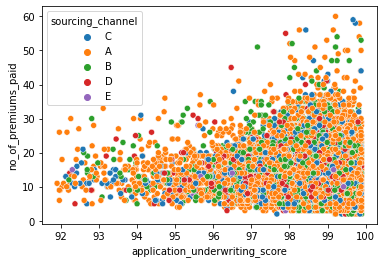

In [226]:
sns.scatterplot(df['application_underwriting_score'], df['no_of_premiums_paid'],hue=df['sourcing_channel']) 

<AxesSubplot:xlabel='premium', ylabel='no_of_premiums_paid'>

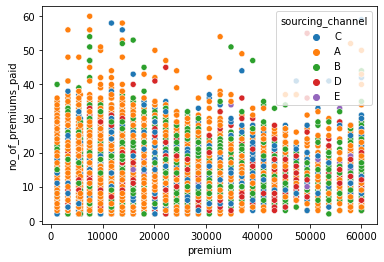

In [227]:
sns.scatterplot(df['premium'], df['no_of_premiums_paid'],hue=df['sourcing_channel'])

<AxesSubplot:>

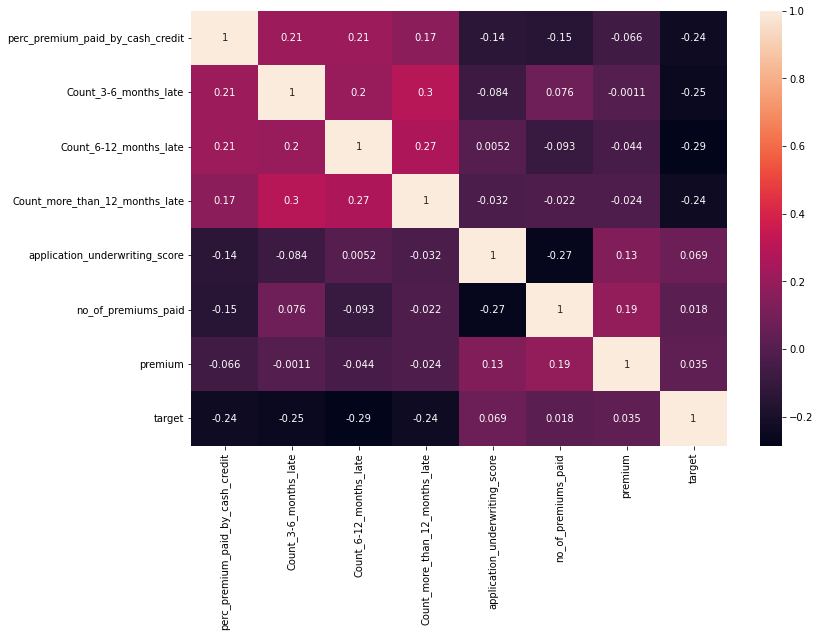

In [228]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

## Hypothesis testing for checking significance of variables

In [229]:
df.head(2)

,perc_premium_paid_by_cash_credit,age_category,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,0.429,young_adult,High,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,0.010,adult,High,0.0,0.0,0.0,99.89,21,A,Urban,18000,1


H0: The variables age_category is not significant
H1: The variables age_category is significant

In [230]:
pd.crosstab(df['age_category'], df['target'])


target,0,1
age_category,,
adult,2630,35894
old_age,752,23047
young_adult,1556,15877


For ⍺ = 0.05 and degrees of freedom = 2

In [231]:
test_stat, p, dof, expected_value = stats.chi2_contingency(pd.crosstab(df['target'], df['age_category']))


print("p-value:", p)
print("Degrees of freedom:", dof)

p-value: 4.7983774414810985e-137
Degrees of freedom: 2


The above output shows that p-value is less than 0.05,thus we can reject the null hypothesis and conclude that the variable
age_category is significant.

H0: The variable residence_area_type is not significant
H1: The variable residence_area_type is significant

In [232]:
pd.crosstab(df['residence_area_type'], df['target'])


target,0,1
residence_area_type,,
Rural,1980,29660
Urban,2958,45158


For ⍺ = 0.05 and degrees of freedom = 1

In [233]:
test_stat, p, dof, expected_value = stats.chi2_contingency(pd.crosstab(df['target'], df['residence_area_type']))


print("p-value:", p)
print("Degrees of freedom:", dof)

p-value: 0.5371882301291143
Degrees of freedom: 1


The above output shows that p-value is more than 0.05,thus we are fail to reject the null hypothesis and conclude that the variable residence_area_type is not significant.

In [234]:
#applying dummy encoding to all the catogerical columns
df_cat_enc=pd.get_dummies(df_cat, drop_first=True)
df_cat_enc.head()

,age_category_old_age,age_category_young_adult,Income_Low,Income_Medium,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0,1,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1
4,1,0,0,1,1,0,0,0,1


In [235]:
df_num_trans.reset_index(drop=True, inplace=True)

In [236]:
df_cat_enc.reset_index(drop=True, inplace=True)

In [237]:
df_target.reset_index(drop=True, inplace=True)

In [238]:
df_num_trans.head()

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium
0,0.731402,-0.440375,-0.227508,-0.221126,-0.361439,0.569007,-1.017929
1,-1.149774,-0.440375,-0.227508,-0.221126,1.791374,1.704120,0.977220
2,1.499795,2.285941,4.395453,4.522313,-0.871719,-0.722338,-1.017929
3,-0.866056,-0.440375,-0.227508,-0.221126,0.831622,-0.221892,0.172586
4,-0.845636,-0.440375,-0.227508,-0.221126,1.724372,0.390962,0.172586


In [239]:
X= pd.concat([df_num_trans,df_cat_enc],axis=1)

In [240]:
X.head()

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,age_category_old_age,age_category_young_adult,Income_Low,Income_Medium,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0.731402,-0.440375,-0.227508,-0.221126,-0.361439,0.569007,-1.017929,0,1,0,0,0,1,0,0,1
1,-1.149774,-0.440375,-0.227508,-0.221126,1.791374,1.704120,0.977220,0,0,0,0,0,0,0,0,1
2,1.499795,2.285941,4.395453,4.522313,-0.871719,-0.722338,-1.017929,0,0,1,0,0,1,0,0,0
3,-0.866056,-0.440375,-0.227508,-0.221126,0.831622,-0.221892,0.172586,0,0,0,0,0,0,0,0,1
4,-0.845636,-0.440375,-0.227508,-0.221126,1.724372,0.390962,0.172586,1,0,0,1,1,0,0,0,1


In [241]:
X.shape

(79756, 16)

In [242]:
df_target.shape

(79756,)

In [243]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [244]:
# Handling imbalanced data using SMOTE technique
st = SMOTETomek()
X_st, y_st = st.fit_resample(X, df_target)

In [245]:
print(Counter(y_st))

Counter({1: 74287, 0: 74287})


In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, test_size=0.3, random_state=1)

In [248]:
print("X_train_base:",X_train.shape)
print("X_test_base:",X_test.shape)
print("y_train_base:",y_train.shape)
print("y_test_base:",y_test.shape)

X_train_base: (104001, 16)
X_test_base: (44573, 16)
y_train_base: (104001,)
y_test_base: (44573,)


In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
logr = LogisticRegression(n_jobs=1,max_iter=100,random_state=1)

In [251]:
logr.fit(X_train,y_train)

LogisticRegression(n_jobs=1, random_state=1)

In [252]:
logr.score(X_train,y_train)

0.7657618676743493

In [253]:
logr.score(X_test,y_test)

0.7639378098849079

In [254]:
ycap = logr.predict(X_test)

In [255]:
ycap

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [256]:
print(metrics.classification_report(y_test, ycap))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     22186
           1       0.75      0.78      0.77     22387

    accuracy                           0.76     44573
   macro avg       0.76      0.76      0.76     44573
weighted avg       0.76      0.76      0.76     44573



This means there's 93.87 % accuracy on our train dataset & 93.78 % accuracy on the test dataset. This also means that the test sample is really a representative of the train sample. However, a training score of 93.87 % is not that great for a good prediction of an unseen test dataset. The test set that We've been using till now was made out of the train dataset. But the test dataset that We've got as "test.csv" file has data of totally new customers. So it's like an unseen data. For this reason, my LogisticRegression model will not give true predictions for the test.csv dataset.

So We'll try another model called DecisionTreeClassifier and see if We can achieve better training score from that.

In [259]:
model_comparison = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'precision', 'Recall','f1_score', 'roc_auc_score'])

In [260]:
def model_param_cal(name, ytest, ypred):
    global model_comparison
    model_comparison = model_comparison.append({'Model_Name':name, 'Accuracy': metrics.accuracy_score(ytest, ypred), 'precision':metrics.precision_score(ytest, ypred), 'Recall': metrics.recall_score(ytest, ypred),'f1_score': metrics.f1_score(ytest, ypred), 'roc_auc_score':metrics.roc_auc_score(ytest, ypred)}, ignore_index= True)

In [261]:
model_param_cal('Logistic Regression Full Model', y_test, ycap)

In [262]:
model_comparison

,Model_Name,Accuracy,precision,Recall,f1_score,roc_auc_score
0,Logistic Regression Full Model,0.763938,0.754909,0.784786,0.769558,0.763843


In [266]:
Xc = sm.add_constant(X_st)

In [267]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xc, y_st, test_size=0.3, random_state=1)

In [268]:
logis_model = sm.Logit(ytrain, Xtrain).fit()
print(logis_model.summary())

Optimization terminated successfully.
         Current function value: 0.486642
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               104001
Model:                          Logit   Df Residuals:                   103984
Method:                           MLE   Df Model:                           16
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:                  0.2979
Time:                        15:05:06   Log-Likelihood:                -50611.
converged:                       True   LL-Null:                       -72088.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0115      0.020     -0.56

In [270]:
logis_model.pvalues

const                                5.695713e-01
perc_premium_paid_by_cash_credit     0.000000e+00
Count_3-6_months_late                0.000000e+00
Count_6-12_months_late               0.000000e+00
Count_more_than_12_months_late       0.000000e+00
application_underwriting_score       2.608820e-59
no_of_premiums_paid                  1.149234e-35
premium                              1.145961e-01
age_category_old_age                 0.000000e+00
age_category_young_adult             2.391511e-31
Income_Low                           1.227007e-08
Income_Medium                        3.617115e-01
sourcing_channel_B                  8.395058e-238
sourcing_channel_C                  4.502486e-192
sourcing_channel_D                  2.861725e-161
sourcing_channel_E                   1.234230e-51
residence_area_type_Urban            7.537186e-37
dtype: float64

In [271]:
dat = pd.DataFrame(np.exp(logis_model.params))
dat

,0
const,0.988594
perc_premium_paid_by_cash_credit,0.488453
Count_3-6_months_late,0.685915
Count_6-12_months_late,0.672692
Count_more_than_12_months_late,0.774451
application_underwriting_score,1.160972
no_of_premiums_paid,0.888517
premium,1.016016
age_category_old_age,3.031569
age_category_young_adult,1.257912


In [278]:
X_train_sigval = X_train.drop(['premium','Income_Medium'], axis = 1)
X_test_sigval = X_test.drop(['premium','Income_Medium'], axis = 1)

In [280]:
lr=LogisticRegression(random_state=1)
lr_model_sig = lr.fit(X_train_sigval, y_train)

In [281]:
lr_model_sig.score(X_train_sigval, y_train)

0.7657810982586706

In [282]:
lr_model_sig.score(X_test_sigval, y_test)

0.7637358939268167

In [283]:
# We cannot see much changes in the model score

In [285]:
y_cap_sig_val = lr_model_sig.predict(X_test_sigval)

In [286]:
print(metrics.classification_report(y_test, y_cap_sig_val))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     22186
           1       0.75      0.78      0.77     22387

    accuracy                           0.76     44573
   macro avg       0.76      0.76      0.76     44573
weighted avg       0.76      0.76      0.76     44573



## Logistic Regression with selected parameters

In [287]:
lr = LogisticRegression()
back_ele = sfs(estimator=lr, k_features='best', forward=False, verbose=2, scoring='accuracy',cv = 5)
fet_sel_model = back_ele.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   26.8s finished

[2023-06-01 15:26:46] Features: 15/1 -- score: 0.7658579931438207[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   24.3s finished

[2023-06-01 15:27:11] Features: 14/1 -- score: 0.7658772234507957[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   20.0s finished

[2023-06-01 15:27:31] Features: 13/1 -- score: 0.7653195232847534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [288]:
print(fet_sel_model.k_feature_names_)
print(fet_sel_model.k_score_)

('perc_premium_paid_by_cash_credit', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'age_category_old_age', 'age_category_young_adult', 'Income_Low', 'Income_Medium', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Urban')
0.7658964532955146


In [289]:
Xbest = X_train[['perc_premium_paid_by_cash_credit', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'age_category_old_age', 'age_category_young_adult', 'Income_Low', 'Income_Medium', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Urban']]
logregg = LogisticRegression(random_state=1)
best_model = logregg.fit(Xbest, y_train)

In [290]:
X_best_test = Xtest[['perc_premium_paid_by_cash_credit', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'age_category_old_age', 'age_category_young_adult', 'Income_Low', 'Income_Medium', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Urban']]
ycapb = best_model.predict(X_best_test)

In [306]:
print(metrics.classification_report(y_test, ycapb))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     22186
           1       0.75      0.78      0.77     22387

    accuracy                           0.76     44573
   macro avg       0.76      0.76      0.76     44573
weighted avg       0.76      0.76      0.76     44573



In [307]:
model_param_cal('Logistic Regression with Backward Elimination', y_test, ycapb)

In [308]:
model_comparison

,Model_Name,Accuracy,precision,Recall,f1_score,roc_auc_score
0,Logistic Regression Full Model,0.763938,0.754909,0.784786,0.769558,0.763843
1,Logistic Regression with Backward Elimination,0.763938,0.754909,0.784786,0.769558,0.763843


## Using Decision Tree Algorithm

In [309]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [310]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1)
decision_tree = dtc.fit(X_train, y_train)

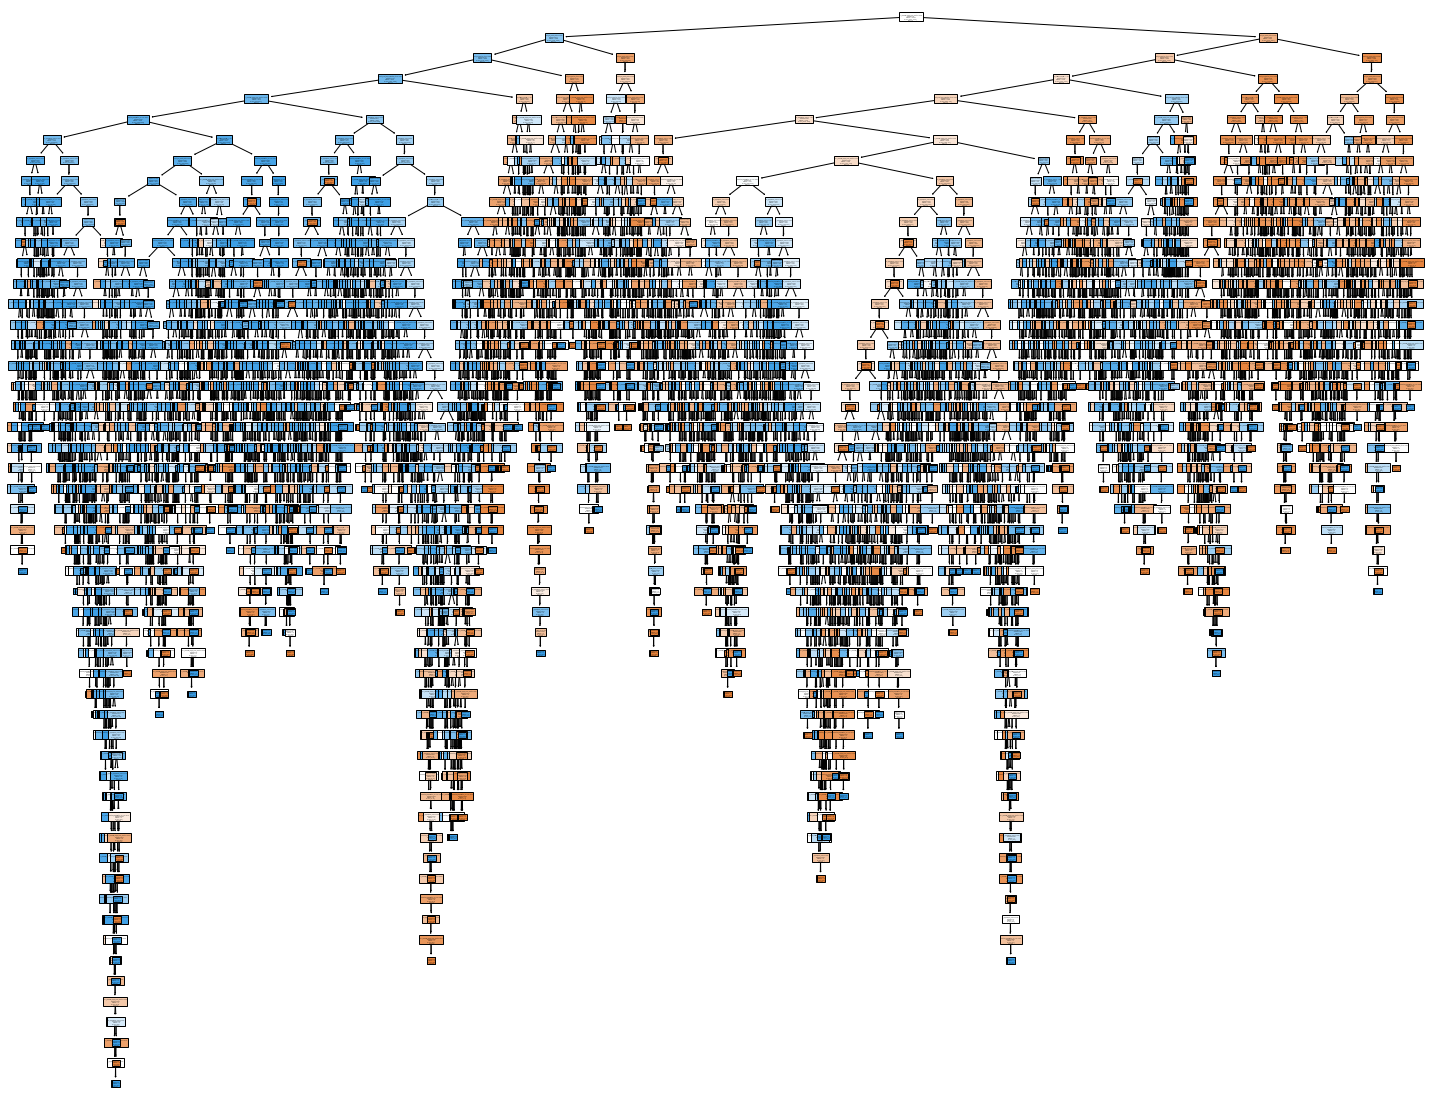

In [311]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=["0","1"], filled=True)

In [312]:
ypred = decision_tree.predict(X_test)

In [313]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     22186
           1       0.93      0.91      0.92     22387

    accuracy                           0.92     44573
   macro avg       0.92      0.92      0.92     44573
weighted avg       0.92      0.92      0.92     44573



In [314]:
model_param_cal('Decision Tree Model', y_test, ypred)

## Random Forest

In [315]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [316]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model = rf.fit(X_train, y_train)

In [317]:
ypred = rf_model.predict(X_test)

In [318]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22186
           1       0.96      0.95      0.95     22387

    accuracy                           0.95     44573
   macro avg       0.95      0.95      0.95     44573
weighted avg       0.95      0.95      0.95     44573



In [319]:
model_param_cal('Random Forest', y_test, ypred)

## ADA Boost 

In [320]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=1)
ada_model = ada_boost.fit(X_train, y_train)

In [321]:
ypred = ada_model.predict(X_test)

In [322]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     22186
           1       0.81      0.87      0.84     22387

    accuracy                           0.83     44573
   macro avg       0.83      0.83      0.83     44573
weighted avg       0.83      0.83      0.83     44573



In [323]:
model_param_cal('ADA Boost', y_test, ypred)

In [126]:
# We have decided to improve the model by hypertuning model parameters

In [324]:
model_comparison

,Model_Name,Accuracy,precision,Recall,f1_score,roc_auc_score
0,Logistic Regression Full Model,0.763938,0.754909,0.784786,0.769558,0.763843
1,Logistic Regression with Backward Elimination,0.763938,0.754909,0.784786,0.769558,0.763843
2,Decision Tree Model,0.921432,0.931145,0.91093,0.920927,0.92148
3,Random Forest,0.952886,0.959543,0.946085,0.952767,0.952917
4,ADA Boost,0.833128,0.814253,0.8651,0.838907,0.832983


## Decision Tree Model with Tuned Parameters

In [325]:
tuned_parameter = [{'criterion':['entropy','gini'], 'max_depth' :[5,10,15,20,25,30], 'max_features':["sqrt","log2"], 'min_samples_split':[2,5,8,10,20], 'max_leaf_nodes':[5,8,10]}]

In [326]:
dec_tree = DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(estimator=dec_tree, param_grid=tuned_parameter, cv=5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best Parameters:',tree_grid_model.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_split': 2}


In [327]:
dt_model = DecisionTreeClassifier(criterion=tree_grid_model.best_params_.get('criterion'), max_depth=tree_grid_model.best_params_.get('max_depth'), max_features=tree_grid_model.best_params_.get('max_features'), max_leaf_nodes=tree_grid_model.best_params_.get('max_leaf_nodes'), min_samples_split=tree_grid_model.best_params_.get('min_samples_split'), random_state=1)
dt_grid_model = dt_model.fit(X_train, y_train)

In [328]:
ypred = dt_grid_model.predict(X_test)

In [329]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76     22186
           1       0.78      0.70      0.74     22387

    accuracy                           0.75     44573
   macro avg       0.75      0.75      0.75     44573
weighted avg       0.75      0.75      0.75     44573



In [330]:
model_param_cal('Decision Tree with tunned parameters', y_test, ypred)

## Random Forest Model with tunned parameters

In [331]:
rnd_fst = RandomForestClassifier(random_state=1)
random_forest_grid = GridSearchCV(estimator=rnd_fst, param_grid=tuned_parameter, cv =3)
rf_grid_model = random_forest_grid.fit(X_train, y_train)
print(rf_grid_model.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_split': 2}


In [332]:
rfgv = RandomForestClassifier(criterion= rf_grid_model.best_params_.get('criterion'), max_depth = rf_grid_model.best_params_.get('max_depth'), max_features=rf_grid_model.best_params_.get('max_features'), max_leaf_nodes=rf_grid_model.best_params_.get('max_leaf_nodes'), min_samples_split=rf_grid_model.best_params_.get('min_samples_split'), random_state=1)
rf_gds_model = rfgv.fit(X_train, y_train)

In [333]:
ypred2 = rf_grid_model.predict(X_test)

In [334]:
print(metrics.classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     22186
           1       0.79      0.75      0.77     22387

    accuracy                           0.77     44573
   macro avg       0.77      0.77      0.77     44573
weighted avg       0.77      0.77      0.77     44573



In [335]:
model_param_cal('Random Forest Model with tunned parameters', y_test, ypred2)

## ADA-Boost Model with Grid Search

In [336]:
tuned_param =[{'n_estimators':[5,10,15,20,30,50,100,110,120,150,200],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], 'algorithm':['SAMME', 'SAMME.R']}]

In [337]:
ada = AdaBoostClassifier(random_state=1)
ada_tunned = GridSearchCV(estimator=ada, param_grid=tuned_param, cv =3)
ada_grid = ada_tunned.fit(X_train, y_train)
print(ada_grid.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}


In [340]:
ada_gv = AdaBoostClassifier(algorithm=ada_grid.best_params_.get('algorithm'), learning_rate=ada_grid.best_params_.get('learning_rate'), n_estimators=ada_grid.best_params_.get('n_estimators'))
ada_gv_model = ada_gv.fit(X_train, y_train)

In [341]:
ypred1= ada_gv_model.predict(X_test)

In [342]:
print(metrics.classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     22186
           1       0.84      0.91      0.87     22387

    accuracy                           0.87     44573
   macro avg       0.87      0.87      0.87     44573
weighted avg       0.87      0.87      0.87     44573



In [343]:
model_param_cal('Ada Boost Model with tunned parameters', y_test, ypred1)

In [346]:
from xgboost import XGBClassifier

In [348]:
xgb = XGBClassifier(n_estimators=100, random_state = 1)

In [349]:
xgb_model = xgb.fit(X_train, y_train)

In [351]:
xgb_model.score(X_train, y_train)

0.9598561552292766

In [353]:
xgb_model.score(X_test, y_test)

0.9503286743095596

In [355]:
ypred_xgb = xgb_model.predict(X_test)

In [356]:
print(metrics.classification_report(y_test, ypred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22186
           1       0.93      0.98      0.95     22387

    accuracy                           0.95     44573
   macro avg       0.95      0.95      0.95     44573
weighted avg       0.95      0.95      0.95     44573



In [357]:
model_param_cal('XGBoost',y_test, ypred_xgb)

## Comparing Different Models

In [358]:
model_comparison

,Model_Name,Accuracy,precision,Recall,f1_score,roc_auc_score
0,Logistic Regression Full Model,0.763938,0.754909,0.784786,0.769558,0.763843
1,Logistic Regression with Backward Elimination,0.763938,0.754909,0.784786,0.769558,0.763843
2,Decision Tree Model,0.921432,0.931145,0.91093,0.920927,0.92148
3,Random Forest,0.952886,0.959543,0.946085,0.952767,0.952917
4,ADA Boost,0.833128,0.814253,0.8651,0.838907,0.832983
5,Decision Tree with tunned parameters,0.748861,0.777976,0.699647,0.736736,0.749084
6,Random Forest Model with tunned parameters,0.773854,0.789972,0.748827,0.76885,0.773967
7,Ada Boost Model with tunned parameters,0.867543,0.84207,0.90624,0.872978,0.867368
8,XGBoost,0.950329,0.927376,0.977666,0.951857,0.950205


In [ ]:
# Comparing all the models we have decided to go with random forest model as our final model.